# 概要

Theanoによる2クラスロジスティック回帰の実装 - 人工知能に関する断創録
http://aidiary.hatenablog.com/entry/20150519/1432038633

# 2クラスロジスティック回帰の実装

0 0.693147180559946
10000 0.5850274988176745
20000 0.5472954636936678
30000 0.5154018233277201
40000 0.48829570918772613
50000 0.46510456912211945
60000 0.44511880949607113
70000 0.42776773553739167
80000 0.41259440170978573
90000 0.3992329345851108
100000 0.38738952271118815
110000 0.3768270969978426
120000 0.36735324836504846
130000 0.35881080316790537
140000 0.35107050510916493
150000 0.3440253352712918
160000 0.337586093856996
170000 0.3316779499890757
180000 0.32623773412082235
190000 0.3212118013445591
200000 0.31655433520912246
210000 0.3122259930214771
220000 0.30819281726149
230000 0.3044253555381947
240000 0.30089794491652894
250000 0.2975881265555657
260000 0.294476164256446
270000 0.2915446463411868
280000 0.28877815473274293
290000 0.2861629885237501
theta: [-9.25573205  0.07960975  0.07329322]


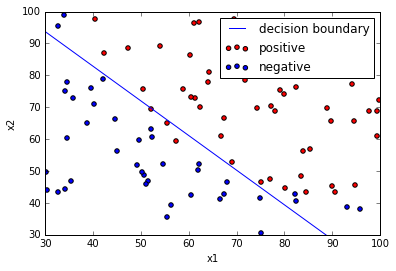

In [13]:
#coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
import theano
import theano.tensor as T
%matplotlib inline

"""
2クラスロジスティック回帰をtheanoで実装
"""

def plot_data(X, y):
    # positiveクラスのデータのインデックス
    positive = [i for i in range(len(y)) if y[i] == 1]
    # negativeクラスのデータのインデックス
    negative = [i for i in range(len(y)) if y[i] == 0]

    plt.scatter(X[positive, 0], X[positive, 1], c='red', marker='o', label="positive")
    plt.scatter(X[negative, 0], X[negative, 1], c='blue', marker='o', label="negative")

if __name__ == "__main__":
    # 訓練データをロード
    data = np.genfromtxt("ex2data1.txt", delimiter=",")
    data_x = data[:, (0, 1)]
    data_y = data[:, 2]

    # 訓練データ数
    m = len(data_y)

    # 訓練データをプロット
    plt.figure(1)
    plot_data(data_x, data_y)

    # 訓練データの1列目に1を追加
    data_x = np.hstack((np.ones((m, 1)), data_x))

    # 訓練データを共有変数にする
    X = theano.shared(np.asarray(data_x, dtype=theano.config.floatX), borrow=True)
    y = theano.shared(np.asarray(data_y, dtype=theano.config.floatX), borrow=True)

    # パラメータを共有変数にし、0で初期化
    # 訓練データに1を加えたのでバイアスもthetaに含めてしまう
    theta = theano.shared(np.zeros(3, dtype=theano.config.floatX), name='theta', borrow=True)

    # コスト関数を定義
    # 交差エントロピー誤差関数
    h = T.nnet.sigmoid(T.dot(X, theta))
    cost = (1.0 / m) * T.sum(-y * T.log(h) - (1 - y) * T.log(1 - h))

    # 勾配降下法
    # コスト関数の微分
    g_theta = T.grad(cost=cost, wrt=theta)

    # パラメータ更新式
    learning_rate = 0.001
    updates = [(theta, theta - learning_rate * g_theta)]

    # 訓練用の関数を定義
    train_model = theano.function(inputs=[], outputs=cost, updates=updates)

    # 高度な収束判定はせずにiterations回だけ繰り返す
    iterations = 300000
    for iter in range(iterations):
        current_cost = train_model()
        if iter % 10000 == 0:
            print(iter, current_cost)

    # 更新されたパラメータを表示
    t = theta.get_value()
    print("theta:", t)

    # 決定境界を描画
    plt.figure(1)
    xmin, xmax = min(data_x[:,1]), max(data_x[:,1])
    xs = np.linspace(xmin, xmax, 100)
    ys = [- (t[0] / t[2]) - (t[1] / t[2]) * x for x in xs]
    plt.plot(xs, ys, 'b-', label="decision boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim((30, 100))
    plt.ylim((30, 100))
    plt.legend()
    plt.show()

# Theanoによる確率的勾配降下法の実装

0 1.145373865148744
100 1.163936219961501
200 1.1560990459845042
300 1.1483244269613901
400 1.140613693541245
500 1.1329680563757094
600 1.1253886100450827
700 1.1178763370683746
800 1.110432111974808
900 1.1030567054159697
1000 1.0957507882994797
1100 1.0885149359266908
1200 1.0813496321184721
1300 1.0742552733146808
1400 1.0672321726343235
1500 1.0602805638848083
1600 1.0534006055099616
1700 1.046592384467715
1800 1.0398559200294937
1900 1.0331911674944205
2000 1.0265980218124353
2100 1.020076321111346
2200 1.0136258501237019
2300 1.0072463435101273
2400 1.000937489076541
2500 0.9946989308832724
2600 0.9885302722447664
2700 0.9824310786190761
2800 0.976400880386844
2900 0.9704391755199727
3000 0.9645454321405149
3100 0.9587190909707684
3200 0.9529595676758111
3300 0.9472662551000417
3400 0.9416385253995535
3500 0.9360757320723347
3600 0.9305772118885616
3700 0.9251422867233369
3800 0.9197702652944355
3900 0.9144604448076531
4000 0.9092121125125381
4100 0.9040245471712826
4200 0.89889

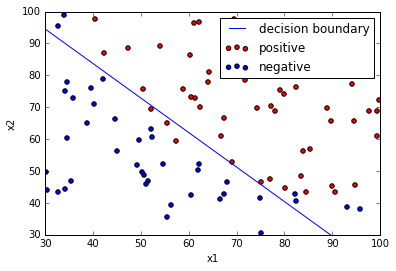

In [17]:
#coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
import theano
import theano.tensor as T
%matplotlib inline

"""
2クラスロジスティック回帰をtheanoで実装
"""

def plot_data(X, y):
    # positiveクラスのデータのインデックス
    positive = [i for i in range(len(y)) if y[i] == 1]
    # negativeクラスのデータのインデックス
    negative = [i for i in range(len(y)) if y[i] == 0]

    plt.scatter(X[positive, 0], X[positive, 1], c='red', marker='o', label="positive")
    plt.scatter(X[negative, 0], X[negative, 1], c='blue', marker='o', label="negative")

if __name__ == "__main__":
    # 訓練データをロード
    data = np.genfromtxt("ex2data1.txt", delimiter=",")
    data_x = data[:, (0, 1)]
    data_y = data[:, 2]

    # 訓練データ数
    m = len(data_y)

    # 訓練データをプロット
    plt.figure(1)
    plot_data(data_x, data_y)

    # 訓練データの1列目に1を追加
    data_x = np.hstack((np.ones((m, 1)), data_x))

    # データをシャッフル
    p = np.random.permutation(m)
    data_x = data_x[p, :]
    data_y = data_y[p]

    # 訓練データを共有変数にする
    X = theano.shared(np.asarray(data_x, dtype=theano.config.floatX), borrow=True)
    y = theano.shared(np.asarray(data_y, dtype=theano.config.floatX), borrow=True)

    # パラメータを共有変数にし、0で初期化
    # 訓練データに1を加えたのでバイアスもthetaに含めてしまう
    theta = theano.shared(np.zeros(3, dtype=theano.config.floatX), name='theta', borrow=True)

    # 訓練データのインデックスを表すシンボルを定義
    index = T.lscalar()

    # コスト関数の微分を構築
    # 確率的勾配降下法なので全データの和ではなく、index番目のデータのみ使う
    h = T.nnet.sigmoid(T.dot(theta, X[index,:]))
    cost = -y[index] * T.log(h) - (1 - y[index]) * T.log(1 - h)

    # コスト関数の微分
    g_theta = T.grad(cost=cost, wrt=theta)

    # 更新式
    learning_rate = 0.0001
    updates = [(theta, theta - learning_rate * g_theta)]

    # 訓練用の関数を定義
    # index番目の訓練データを使ってパラメータ更新
    train_model = theano.function(inputs=[index], outputs=cost, updates=updates)

    # 確率的勾配降下法
    max_epoch = 5000
    for epoch in range(max_epoch):
        for i in range(m):
            current_cost = train_model(i)
        if epoch%100 == 0:
            print(epoch, current_cost)

    # 更新されたパラメータを表示
    t = theta.get_value()
    print("theta:", t)

    # 決定境界を描画
    plt.figure(1)
    xmin, xmax = min(data_x[:,1]), max(data_x[:,1])
    xs = np.linspace(xmin, xmax, 100)
    ys = [- (t[0] / t[2]) - (t[1] / t[2]) * x for x in xs]
    plt.plot(xs, ys, 'b-', label="decision boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim((30, 100))
    plt.ylim((30, 100))
    plt.legend()
    plt.show()

# 正則化項の導入

0 0.6931471805599461
10000 0.6285021914912272
20000 0.5975107939021763
30000 0.5782055714415457
40000 0.5654049820291446
50000 0.5566722757298791
60000 0.5506081675426936
70000 0.5463412352921074
80000 0.5433069264079737
90000 0.5411301758278821
100000 0.5395570377019899
110000 0.5384129163096704
120000 0.5375762324392183
130000 0.536961412128686
140000 0.53650767323916
150000 0.5361715056580307
160000 0.5359215535800993
170000 0.535735088101236
180000 0.5355955491992114
190000 0.5354908166250684
200000 0.5354119835348797
210000 0.5353524804593418
220000 0.5353074456137761
230000 0.5352732697899275
240000 0.5352472658295755
250000 0.5352274275399163
260000 0.5352122531664317
270000 0.5352006156833975
280000 0.5351916671805997
290000 0.5351847681757642
theta: [ 1.13017334  0.59348046  1.15728862 -1.85800971 -0.89152632 -1.23746825
  0.12108449 -0.3626094  -0.34531491 -0.17431849 -1.41297153 -0.05921293
 -0.59564678 -0.2630441  -1.15211095 -0.24171457 -0.20750248 -0.0505973
 -0.2734934  

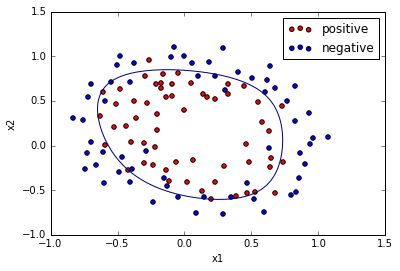

In [18]:
#coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
import theano
import theano.tensor as T
%matplotlib inline

"""
2クラスロジスティック回帰（非線形分離の例）をtheanoで実装
"""

def plot_data(X, y):
    # positiveクラスのデータのインデックス
    positive = [i for i in range(len(y)) if y[i] == 1]
    # negativeクラスのデータのインデックス
    negative = [i for i in range(len(y)) if y[i] == 0]

    plt.scatter(X[positive, 0], X[positive, 1], c='red', marker='o', label="positive")
    plt.scatter(X[negative, 0], X[negative, 1], c='blue', marker='o', label="negative")

def mapFeature(x1, x2, degree=6):
    """
    特徴x1と特徴x2を組み合わせたdegree次の項まで特徴をデータに追加
    バイアス項に対応するデータ1も追加
    """
    # データ行列に1を追加
    m = x1.shape[0]
    data_x = np.ones((m, 1))
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            new_x = (x1 ** (i - j) * x2 ** j).reshape((m, 1))
            data_x = np.hstack((data_x, new_x))
    return data_x

if __name__ == "__main__":
    # 訓練データをロード
    data = np.genfromtxt("ex2data2.txt", delimiter=",")
    data_x = data[:, (0, 1)]
    data_y = data[:, 2]

    # 訓練データ数
    m = len(data_y)

    # 訓練データをプロット
    plt.figure(1)
    plot_data(data_x, data_y)

    # 特徴量のマッピング
    # 元の特徴量の6次までの多項式項を追加
    # 1列目の1も追加する
    data_x = mapFeature(data_x[:, 0], data_x[:, 1], 6)

    # 訓練データを共有変数にする
    X = theano.shared(np.asarray(data_x, dtype=theano.config.floatX), borrow=True)
    y = theano.shared(np.asarray(data_y, dtype=theano.config.floatX), borrow=True)

    # パラメータを共有変数にし、0で初期化
    # 訓練データに1を加えたのでバイアスもthetaに含めてしまう
    theta = theano.shared(np.zeros(data_x.shape[1], dtype=theano.config.floatX), name='theta', borrow=True)

    # コスト関数を定義
    # 交差エントロピー誤差関数
    lam = 1.0
    h = T.nnet.sigmoid(T.dot(X, theta))
    cost = (1.0 / m) * T.sum(-y * T.log(h) - (1 - y) * T.log(1 - h)) + (lam / (2 * m)) * T.sum(theta ** 2)

    # 勾配降下法
    # コスト関数の微分
    g_theta = T.grad(cost=cost, wrt=theta)

    # パラメータ更新式
    learning_rate = 0.001
    updates = [(theta, theta - learning_rate * g_theta)]
    # 訓練用の関数を定義
    train_model = theano.function(inputs=[], outputs=cost, updates=updates)
    # 高度な収束判定はせずにiterations回だけ繰り返す
    iterations = 300000
    for iter in range(iterations):
        current_cost = train_model()
        if iter % 10000 == 0:
            print(iter, current_cost)

    # 更新されたパラメータを表示
    t = theta.get_value()
    print("theta:", t)

    # 決定境界を描画
    plt.figure(1)
    gridsize = 100
    x1_vals = np.linspace(-1, 1.5, gridsize)
    x2_vals = np.linspace(-1, 1.5, gridsize)
    x1_vals, x2_vals = np.meshgrid(x1_vals, x2_vals)
    z = np.zeros((gridsize, gridsize))
    for i in range(gridsize):
        for j in range(gridsize):
            x1 = np.array([x1_vals[i, j]])
            x2 = np.array([x2_vals[i, j]])
            z[i, j] = np.dot(mapFeature(x1, x2), theta.get_value())

    # 決定境界はsigmoid(z)=0.5、すなわちz=0の場所
    plt.contour(x1_vals, x2_vals, z, levels=[0])
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim((-1, 1.5))
    plt.ylim((-1, 1.5))
    plt.legend()
    plt.show()